<!--NOTEBOOK_HEADER-->
*This notebook contains material from [CBE30338](https://jckantor.github.io/CBE30338);
content is available [on Github](https://github.com/jckantor/CBE30338.git).*

<!--NAVIGATION-->
< [B.0 Student Projects](https://jckantor.github.io/CBE30338/B.00-Student-Projects.html) | [Contents](toc.html) | [Tag Index](tag_index.html) |

# B.1 Diabetes: Controlling Blood Glucose Concentrations

Kevin Hansen, James Bathon, Ramon Villafana

## B.1.1 Problem Statement

### B.1.1.1 Introduction and Problem
Diabetes is a condition that affects a person’s ability to regulate their blood glucose level. There are several forms of diabetes such as Type 1, Type 2 and Gestational diabetes. In a healthy person, the pancreas is the main organ that works to control blood glucose levels - glucose being the body’s main source of energy. When blood sugar decreases, the pancreas beta cells are signaled to release glucagon. Glucagon is a signaling hormone that stimulates the liver to release glucose stores, subsequently increasing blood glucose levels. When blood glucose is high or increasing, the pancreas alpha cells release insulin. Insulin is an endocrine signaling hormone that stimulates and allows somatic tissues and cells to take up blood glucose for energy usage or storage, which subsequently decreases blood glucose levels.  

Type 1 diabetes, or insulin-dependent diabetes, is a chronic condition in which the pancreas produces little to no insulin. As a result, blood sugar concentrations can rise to dangerous levels. This can be caused by various factors such as genetics, an autoimmune condition, or disease. Type 1 diabetes is treated through insulin injections and by managing blood glucose levels through diet and exercise to prevent complications. With insulin injections, there is the risk of overdosing, which could lead to over-uptake of blood glucose. This can cause low blood glucose levels and is referred to as hypoglycemia. Symptoms of hypoglycemia include chills, confusion, shakiness, unconsciousness and possibly death. If insulin is not administered, blood glucose levels could become dangerously high, a condition which is referred to as hyperglycemia. Recurrent hyperglycemia can cause neuropathy (leading to amputation), retinopathy (leading to blindness), blood vessel damage and kidney damage.  With Type 1 diabetes, individuals check their blood glucose with a hand-held meter or a body attachment monitor. Based on the reading from the monitor, the individual would determine how much insulin is needed. Typically, insulin injections occur two to four times a day, but diet and lifestyle (such as exercise) can cause this to change, as both of them impact blood glucose levels. Such management can be a lot of work and a hassle for the individual. One method to improve the life of those with insulin dependence would be to use an automated insulin pump that could measure blood glucose levels and administer insulin automatically.

Consequently, it would be advantageous to model blood glucose levels in these diabetic individuals and provide insulin administration methods that maintain blood glucose levels within healthy ranges. Doing so would help lead to improved quality of life and overall health for diabetic patients.  

### B.1.1.2 Technology Challenge

Conventionally, for Type 1 diabetes, blood glucose levels are monitored by personal devices that test the glucose levels from drops of the patient’s blood. More recent technologies have resulted in continuous glucose monitoring systems, which consist of sensors placed under the skin that monitor blood glucose levels once every 1-15 minutes. Based on the readings from either of these monitoring systems, insulin dosages would need to be administered in order to achieve acceptable blood glucose levels. 

The challenge associated with this is determining acceptable insulin dosage frequencies and amounts to ensure that blood glucose levels do not rise or drop into unhealthy ranges. This is especially difficult when considering the effects of meals and exercise, as these activities can cause significant changes in blood glucose concentrations when compared to normal behavior. In severe cases, diabetic patients have to actively keep track of exercise habits and glucose content of meals in order to ensure that their blood glucose levels are within the healthy range.

To improve quality of life, it would be ideal to pair continuous glucose monitoring devices to an automated insulin pump, which would be attached to diabetic patients to recommend how much insulin to administer to the patient and when to administer the insulin. Currently, these insulin pumps are designed to administer insulin at a basal rate with increased dosages before or after meals, which are designated as bolus doses. The goal is to determine adequate basal rates and bolus dose systems for administering insulin while taking into account fluctuations in the patients’ glucose intake and physical activities.

### B.1.1.3 Goals and Objectives:

1) To create a simulation for blood glucose and insulin concentrations for a patient with Type 1 diabetes while taking into account disturbances in glucose concentration due to meals and exercise.

2) To model high concentration injections and basal dosage administration of insulin and observe their effects on blood glucose and insulin concentrations under normal conditions and in the presence of disturbances such as meals and exercise.

3) Use PID-control to regulate insulin administration in response to blood glucose levels in order to maintain a setpoint blood glucose concentration.

4) Determine individual treatments and combinations of treatments that provide acceptable blood glucose control in the presence of meal and exercise disturbances.

## B.1.2 Theoretical Development

### B.1.2.1 The Bergman Model for Type I Diabetes

A popular model for describing blood glucose control in diabetic patients is known as the Bergman Minimal Model, a system of three ordinary differential equations. The primary variables involved include $G$, the deviation of the blood glucose concentration from basal levels measured in $mg\space dL^{-1}$, $I$, the deviation of the blood insulin concentration from basal levels measured in $mU\space L^{-1}$, and $X$, a proportionality variable that describes the insulin concentration in a remote compartment measured in $mU\space L^{-1}$. (The unit $U$ represents units of Insulin, which are roughly equivalent to $0.01 mL$) Written as a system of equations, the Bergman Model can be represented as:

$$ \frac{dG}{dt} = -P_1G - X(G+G_b) + D $$
$$ \frac{dI}{dt} = -n(I+I_b) + \frac{U}{V_1} $$
$$ \frac{dX}{dt} = -P_2X + P_3I $$

The parameters present in these equations represent rates and conversions for the different processes that this model simulates. $G_b$ represents the basal blood glucose level, $I_b$ represents the basal blood insulin level, $V_1$ represents the effective tissue and blood volume in the body, $P_1$ describes glucose removal from bloodstream independent of insulin, $P_2$ describes the insulin removal rate from the remote compartment, $P_3$ describes the insulin appearance rate in the remote compartment, and $n$ describes the insulin removal rate from the bloodstream. Some typical values and units for each of these parameters are included in the table below.

|Parameter|Typical Magnitude      |Units    |
|---------|---------------|---------|
| $G_b$   | $81$          | $mg \space dL^{-1}$ |
| $I_b$   | $15$          | $mU L^{-1}$ |
| $n$     | $0.0926$      | $min^{-1}$ | 
| $V_1$   | $12$          | $L$  |
| $P_1$   | $\leq 0.035$    | $min^{-1}$ |
| $P_2$   | $0.025$       | $min^{-1}$ |
| $P_3$   | $5.3*10^{-5}$ | $min^{-1}$ |


Two important variables present in the model are $D$ and $U$, which are time-dependent variables. $D$ is a disturbance variable representing the intake of glucose from external sources, typically food, and is measured in $mg\space dL^{-1} min^{-1}$. For the purpose of the model, $D$ is represented by the equation:

$$ D(t) = \frac{F_g}{V_g}e^{-0.05t} $$

where $V_g$ is the glucose distribution volume which is based on an individual's weight and size and $F_g$ is the rate of glucose infusion dependent on the glucose contained within a meal and an individual's weight and size.

$U$ is the insulin input from an external source and into the bloodstream, measured in $mU\space min^{-1}$. For the purposes of this study, a PID controller was utilized to provide a control mechanism to maintain $G$ at a given setpoint $G_{sp}$. The governing equation for a PID controller is:

$$ U = \bar{U}_{ff} + K_p(G-G_{sp}) + K_d\frac{dG}{dt} + K_e\int_0^\infty(G-G_{sp})dt $$

In this controller setup, $\bar{U}_{ff}$ is a feedforward controller output determined by a steady-state behavior in which the glucose concentration is equal to the setpoint. This feedforward term would serve as the basal rate of insulin administration. $K_p$ is the proportional controller gain which influences how insulin output from the controller changes based on glucose deviation from the setpoint. For this system, the desired output when $G>G_{sp}$ is an increase in insulin from the controller. $K_d$ is the derivative controller gain which influences how insulin output from the controller changes based on the rate at which the glucose concentration changes with time. For this system, the desired output is to decrease insulin output when $\frac{dG}{dt}$ is negative and large in magnitude and increase insulin output when $\frac{dG}{dt}$ is positive and large in magnitude. $K_e$ is the integral controller gain which influences how insulin output from the controller changes based on the cumulative deviation of the glucose concentration from the setpoint. For this system, the desired output is to eliminate small deviations from the setpoint using this term.

Another input mechanism analyzed was a high concentration insulin injection, which was modeled similarly to the glucose disturbance function. Current injections utilize high-concentration, fast-acting insulin and are administered a short period of time prior to meals. Our interpretation of the insulin absorbance rate is:

$$ U = \bar{U}_{inject}e^{-10t}$$

In this equation, the insulin decay rate is $10$ instead of $0.05$ (the glucose decay rate after meals) because the insulin is directly injected into the bloodstream. Normally, injections would instead be modeled by a delta function, but limitations on the absorption of insulin into the blood and tissues throughout the body was predicted to cause injections to be better represented by a sharp exponential function.  $\bar{U}_{inject}$ is an estimated parameter that determines the sharpness of the injection peak, which was estimated to scale with the glucose intake from corresponding meals. Values for this parameter are displayed in the following table and were approximated based on typical dosages for high-concentration injections.

| Meal|Typical Magnitude      |Units    |
|---------|---------------|---------|
| Breakfast | $5000$          | $mU min^{-1}$ |
| Lunch       | $7500$          | $mU min^{-1}$ |
| Dinner      | $10000$ | $mU min^{-1}$ |

### B.1.2.2 Exercise Model
A variation of the Bergman Minimal Model includes variables typically used to describe actions in the respiratory system and uses them to estimate blood glucose concentrations as a result of physical activity. The primary variables involved include all the same variables and parameters from the Bergman Minimal Model alongside $G_{prod}$, glucose release from the liver caused by exercise and measured in $mg\space kg^{-1}\space min^{-1}$, $G_{up}$, the glucose absorption rate caused by exercise in $mg\space kg^{-1}\space min^{-1}$, $G_{gly}$, the decrease in glycogen levels due to the liver converting glycogen reserves to glucose in $mg\space kg^{-1}\space min^{-1}$, $I_e$, the insulin removal rate due to exercise measured in in $mU\space L^{-1}\space min^{-1}$, $PVO_2^{max}$, the percentage of the maximum oxygen consumption rate in $mL\space kg^{-1}\space min^{-1}$, and $A$, the integral of exercise intensity. Expressed in full, the model is:

$$ \frac{dG}{dt} = -P_1G - X(G+G_b) + D + \frac{W}{V_G}(G_{prod}-G_{gly}-G_{up})$$
$$ \frac{dI}{dt} = -n(I+I_b) + \frac{U}{V_1} - I_e$$
$$ \frac{dX}{dt} = -P_2X + P_3I $$
$$ \frac{dG_{prod}}{dt} = a_1PVO_2^{max}-a_2G_{prod} $$
$$ \frac{dG_{up}}{dt} = a_3PVO_2^{max}-a_4G_{up} $$
$$ \frac{dI_e}{dt} = a_5PVO_2^{max}-a_6I_e $$
$$ \frac{dPVO_2^{max}}{dt} = 0.8(u_{ex}-PVO_2^{max}) $$
$$ \frac{dG_{gly}}{dt} = \left\{
        \begin{array}{ll}
            0 & \quad A < A_{TH} \\
            k & \quad A \geq A_{TH} \\
            -\frac{G_{gly}}{T_1} & \quad u_{ex} = 0
        \end{array}
    \right. $$
$$ \frac{dA}{dt} = \left\{
        \begin{array}{ll}
            u_{ex} & \quad u_{ex} > 0 \\
            -A/0.001 & \quad u_{ex} = 0
        \end{array}
    \right. $$

The parameters $P_1$, $P_2$, $P_3$, $G_b$, $I_b$, $n$, and $V_1$ are the same as the Bergman Minimal Model. New parameters include $W$, the patient's weight, $T_1$, the time constant describing the time it takes for glycogen levels to return to basal levels, $k$, the rate of glycogen depletion when glycogen stores become close to depleted, and $a_1$ through $a_6$, which relate the percentage of the maximum oxygen consumption rate to the glucose release rate from the liver, insulin removal rate due to exercise, and the glucose absorption rate caused by exercise. Their typical values are described below with units.

|Parameter|Typical Magnitude|Units    |
|---------|-----------------|---------|
| $W$     | $62-81$          | $kg$ |
| $V_G$   | $117-136$        | $dL$ |
| $T_1$   | $1.86-10.14$     | $min$ | 
| $k$     | $0.0085-0.0131$  | $mg\space kg^{-1}\space min^{-2}$ | 
| $a_1$   | $0.0013-0.0019$  | $mg\space kg^{-1}\space min^{-2}$ | 
| $a_2$   | $0.0441-0.0679$  | $min^{-1}$ | 
| $a_3$   | $0.0015-0.0024$  | $mg\space kg^{-1}\space min^{-2}$ | 
| $a_4$   | $0.0355-0.0617$  | $min^{-1}$ | 
| $a_5$   | $0.0010-0.0015$  | $mU\space L^{-1}\space min^{-2}$ | 
| $a_6$   | $0.0588-0.0912$  | $min^{-1}$ | 

$u_{ex}$ is a variable which describes exercise magnitude, ranges from 0-92, has the same units as $PVO_2^{max}$, and varies with time. $A_{TH}$, the critical threshold value for energy expenditure, varies with $u_{ex}$, according to the equation:
$$ A_{TH} = −1.1521(u_{ex})^2 + 87.471(u_{ex})$$

### B.1.2.3 Core Model Assumptions
The core assumptions made when using the Bergman Minimal Model and Exercise Model to simulate the blood glucose and blood insulin concentrations in Type I diabetes patients included:

1) The values for parameters $P_1$,  $P_2$,  $P_3$, $a_1$, $a_2$, $a_3$, $a_4$, $a_5$, $a_6$, $k$, and $T_1$ are valid for the different scenarios tested.

2) The recommended ceiling for blood glucose levels following a meal is $180\space mg\space dL^{-1}$, which must be met after 60 minutes.

3) The recommended bounds for blood glucose levels prior to a meal are $80-130\space mg\space dL^{-1}$.

4) The volume of blood and tissue of patients who are not obese and are obese is approximately $12\space L$, as specified in the first table.

5) The ratio of glucose infusion rate to glucose distribution volumes for an average person was $6.0\space mg\space dL^{-1} \space min^{-1}$ at breakfast, $9.0\space mg\space dL^{-1} \space min^{-1}$ at lunch, and $12.0\space mg\space dL^{-1} \space min^{-1}$ at dinner. For obese patients, these values were increased by a factor of $1.124$ due to a larger glucose distribution volume and considerably larger average weight.

6) The decay rate of insulin from high-concentration injections follows a sharp exponential decay instead of a delta function.

7) The decay constants in the exponentials of the glucose disturbance function and insulin injection exponential are $0.05\space min^{-1}$ and $10\space min^{-1}$ respectively.

## B.1.3 Results and Executable Elements

### B.1.3.1 Import Libraries

In [ ]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

### B.1.3.2 Define Model Function for Bergman Model
Function that expresses the set of differential equations, has booleans to activate/deactivate certain variables, and takes in parameter values in order to evaluate blood glucose and insulin levels in the body as it changes in time.

In [ ]:
def bergman(y,t,obese_set,U_set,P1,Kp,Kd,Ke,Gsp):
    
    # E is the integral control term used in PID-Control
    # obese_set and U_set are settings that determine whether the system is solved for an obese
    #   Type I Diabetes patient and whether the system is solved using controller input
    
    G,I,X,E = y # unpack y variable into its component parts
    
    # Define the Glucose Disturbance Function based on food intake (mg/dL/min)
    D = disturb_meal(t,obese_set,t_b,t_l,t_d)    
    
    # Create a differential equation for evaluating the integral control term
    if G-Gsp < 15:   # Prevent integral term from "winding up" by limiting its application
        dEdt = G-Gsp # to scenarios close to steady-state
    else:
        dEdt = 0
        
    # Glucose Concentration Differential Equation
    dGdt = -P1*G - X*(G+Gb) + D
    
    # Define the controller behavior with respect to controller gain
    U_max = 50 # Set an upper limit on the controller input
    U_basal = n*V1*(Ib-P2*P1*Gsp/P3/(Gsp+Gb)) # Base Controller Input derived from a steady-state G at Gsp
    
    if U_set == 0: # allow a setting where there is no controller input
        U = 0
    elif U_set == 1: # allow a setting where the controller input is just a basal dose
        U = U_basal
    elif U_set == 2: # allow a setting where the controller input is just a single, high concentration
        U2 = U_meal(t,t_b,t_l,t_d,t_p) # injection of insulin prior to meal
        U = U2
    elif U_set == 3: # allow a setting where the controller input is a high concentration injection
        U2 = U_meal(t,t_b,t_l,t_d,t_p) # of insulin prior to meal alongside the basal dose
        U = U_basal + U2
    elif U_set == 4: # allow a setting where the controller input is PID control without basal dose
        U_comp = Kp*(G-Gsp)+Kd*(dGdt)+Ke*E  
        U = max(0,min(U_max,U_comp))                 
    elif U_set == 5: # allow a setting where the controller input is PID control with basal dose
        U_comp = U_basal + Kp*(G-Gsp)+Kd*(dGdt)+Ke*E  
        U = max(0,min(U_max,U_comp))
    elif U_set == 6: # allow a setting that combines PID control and high concentration injection with basal dose
        U_comp = U_basal + Kp*(G-Gsp)+Kd*(dGdt)+Ke*E
        U = max(0,min(U_max,U_comp))
        U2 = U_meal(t,t_b,t_l,t_d,t_p)
        U = U + U2        
    
    # Remaining Differential Equations
    dIdt = -n*(I+Ib) + U/V1
    dXdt = -P2*X + P3*I
    
    return [dGdt,dIdt,dXdt,dEdt]

### B.1.3.3 Define Model Function for Exercise Model
Function that expresses the set of differential equations, has booleans to activate/deactivate certain variables, and takes in parameter values in order to evaluate blood glucose and insulin levels in the body as it changes in time.

In [ ]:
def bergman_ex(y,t,obese_set,U_set,P1,Kp,Kd,Ke,Gsp):

    G,I,X,Gprod,Gup,Ie,PVO2,Ggly,A,E = y
    
    # Define the Glucose Disturbance Function based on food intake (mg/dL/min)
    if t>=t_b_ex:
        D = Fg_break*np.exp(-0.05*(t-t_b_ex)) # breakfast
    else:
        D = 0
    
    # Define Exercise Variable u_ex, which is a function that depends on start time and duration
    if t < t_ex_start + duration and t >= t_ex_start:
        u_ex = ex_set
    else:
        u_ex = 0
    Ath = -1.1521*(u_ex)**2+87.471*(u_ex)
    
    # Set parameters for obese patients and non-obese patients
    if obese_set == 1:
        W = avg_w_obese
        Vg = Vg_obese
        D = D*glucose_inf_ratio
    else:
        W = avg_w_lean
        Vg = Vg_lean
    
    # Define how the deviation in glucose concentration changes with time
    dGdt = -P1*G - X*(G+Gb) + D + W/Vg*(Gprod-Gup-Ggly)
    
    # Create a differential equation for evaluating the integral control term
    if G-Gsp < 15:
        dEdt = G-Gsp
    else:
        dEdt = 0
    
    # Define the controller behavior with respect to controller gain
    U_max = 50 # Set an upper limit on the controller input
    U_basal = n*V1*(Ib-P2*P1*Gsp/P3/(Gsp+Gb)) # Base Controller Input derived from a steady-state G at Gsp
    if U_set == 0: # allow a setting where there is no controller input
        U = 0
    elif U_set == 1: # allow a setting where the controller input is just a basal dose
        U = U_basal
    elif U_set == 2: # allow a setting where the controller input is PID control without basal dose
        U_comp = Kp*(G-Gsp)+Kd*(dGdt)+Ke*E  
        U = max(0,min(U_max,U_comp))                 
    elif U_set == 3: # allow a setting where the controller input is PID control with basal dose
        U_comp = U_basal + Kp*(G-Gsp)+Kd*(dGdt)+Ke*E  
        U = max(0,min(U_max,U_comp))

    # Define how the deviation in insulin concentration and the intermediate variable change with time
    dIdt = -n*(I+Ib) + U/V1 - Ie
    if I <= -15:
        dIdt = max(0,dIdt)
    dXdt = -P2*X + P3*I
    
    # Define the remaining differential equations
    dGproddt = a1*PVO2-a2*Gprod
    dGupdt = a3*PVO2-a4*Gup
    dIedt = a5*PVO2-a6*Ie
    dPVO2dt = 0.8*(u_ex-PVO2)
    
    if u_ex > 0:
        dAdt = u_ex
    else:
        dAdt = -A/dt

    if A < Ath:
        dGglydt = 0
    elif A >= Ath and u_ex > 0:
        dGglydt = k
    elif u_ex == 0:
        dGglydt = -Ggly/T1
    
    if A < 0:
        A = 0
            
    return [dGdt,dIdt,dXdt,dGproddt,dGupdt,dIedt,dPVO2dt,dGglydt,dAdt,dEdt]

### B.1.3.4 Disturbance Function
Function that takes in parameters corresponding to glucose levels for different meals and outputs the blood glucose infusion rate for use in calculating the change in blood glucose concentration with time.

In [ ]:
def disturb_meal(t,obese_set,t_breakfast,t_lunch,t_dinner):
    # Function which descibes glucose intake rate due to different meals
    # Takes into account whether patient is obese and the different meal sizes and times at which they are eaten
    if t<t_lunch and t>=t_breakfast:
        D = Fg_break*np.exp(-0.05*(t-t_breakfast)) # breakfast
    elif t>=t_lunch and t<t_dinner:
        D = Fg_lunch*np.exp(-0.05*(t-t_lunch)) # lunch
    elif t>=t_dinner:
        D = Fg_dinner*np.exp(-0.05*(t-t_dinner)) # dinner
    else:
        D = 0
    if obese_set == 1:
        D = D*glucose_inf_ratio # account for glucose intake difference for obese patients
    return D

### B.1.3.5 Injection Function
Function that takes in parameters corresponding to the time values of meals as well as the time before the meal in which an insulin injection occurs. The output represents the insulin response to the injection.

In [ ]:
def U_meal(t,t_breakfast,t_lunch,t_dinner,t_prior):
    t_1 = t_breakfast-t_prior
    t_2 = t_lunch-t_prior
    t_3 = t_dinner-t_prior
    if t >= t_1 and t < t_2:
        U2 = 5000*np.exp(-10*(t-t_1))
    elif t >= t_2 and t < t_3:
        U2 = 7500*np.exp(-10*(t-t_2))
    elif t >= t_3:
        U2 = 10000*np.exp(-10*(t-t_3))
    else:
        U2 = 0
    return U2

### B.1.3.6 Solver Functions for Bergman Model and Exercise Model
Functions that utilize odeint to calculate the responses of blood glucose and insulin concentration over designated timeframes.

In [ ]:
def solve_system(P1,U_set,Kp,Kd,Ke,Gsp):
    # Solve the system for the obese scenario
    obese_set = 1
    soln_obese = odeint(bergman,y0,t,args=(obese_set,U_set,P1,Kp,Kd,Ke,Gsp))
    G_obese = soln_obese[:,0] + Gb
    I_obese = soln_obese[:,1] + Ib

    # Solve the system for the normal scenario
    obese_set = 0
    soln_lean = odeint(bergman,y0,t,args=(obese_set,U_set,P1,Kp,Kd,Ke,Gsp))
    G_lean = soln_lean[:,0] + Gb
    I_lean = soln_lean[:,1] + Ib
    
    soln = np.concatenate(([G_obese],[I_obese.T],[G_lean.T],[I_lean.T])).T
    return soln

In [ ]:
def solve_system_ex(P1,U_set,Kp,Kd,Ke,Gsp):
    # Solve the system for the obese scenario
    obese_set = 1
    soln_obese = odeint(bergman_ex,y0_ex,t_ex,args=(obese_set,U_set,P1,Kp,Kd,Ke,Gsp))
    G_obese = soln_obese[:,0] + Gb
    I_obese = soln_obese[:,1] + Ib

    # Solve the system for the normal scenario
    obese_set = 0
    soln_lean = odeint(bergman_ex,y0_ex,t_ex,args=(obese_set,U_set,P1,Kp,Kd,Ke,Gsp))
    G_lean = soln_lean[:,0] + Gb
    I_lean = soln_lean[:,1] + Ib
    
    soln = np.concatenate(([G_obese],[I_obese.T],[G_lean.T],[I_lean.T])).T
    return soln

### B.1.3.7 Plotting Function
Functions that take in blood glucose and insulin levels and plots them against time. Also compares blood glucose levels to recommended levels both before and after meals as well as the controller setpoint.

In [ ]:
def plot_model(t,soln,soln_s):
    upper_pre = np.ones(len(t))*130
    lower_pre = np.ones(len(t))*80
    upper_post = np.ones(len(t))*180
    setpoint_G = np.ones(len(t))*(Gsp+Gb)
    
    plt.figure(figsize=(16,10))
    plt.subplot(2,2,1)
    plt.plot(t,soln[:,0],'b',t,soln[:,2],'k',
             t,setpoint_G,'g--',t,upper_post,'r--',t,upper_pre,'y--',t,lower_pre,'y--')
    plt.grid()
    plt.title('Glucose Concentration vs Time for Type 1 Diabetes')
    plt.tight_layout()
    plt.xlabel('Time (min)')
    plt.ylabel('Blood Glucose Concentration (mg/dL)')
    plt.legend(['Obese Scenario','Normal Scenario','Controller Setpoint',
                'Post-Meal Limit (60 min)','Pre-Meal Limits'])
    
    plt.subplot(2,2,2)
    plt.plot(t,soln_s[:,0],'b',t,soln_s[:,2],'k',
             t,setpoint_G,'g--',t,upper_post,'r--',t,upper_pre,'y--',t,lower_pre,'y--')
    plt.grid()
    plt.title('Glucose Concentration vs Time for Severe Type 1 Diabetes')
    plt.tight_layout()
    plt.xlabel('Time (min)')
    plt.ylabel('Blood Glucose Concentration (mg/dL)')
    plt.legend(['Obese Scenario','Normal Scenario','Controller Setpoint',
                'Post-Meal Limit (60 min)','Pre-Meal Limits'])
    
    plt.subplot(2,2,3)
    plt.plot(t,soln[:,1],'b',t,soln[:,3],'k')
    plt.grid()
    plt.title('Insulin Concentration vs Time for Type 1 Diabetes')
    plt.tight_layout()
    plt.xlabel('Time (min)')
    plt.ylabel('Blood Insulin Concentration (mU/L)')
    plt.legend(['Obese Scenario','Normal Scenario'])
    
    plt.subplot(2,2,4)
    plt.plot(t,soln_s[:,1],'b',t,soln_s[:,3],'k')
    plt.grid()
    plt.title('Insulin Concentration vs Time for Severe Type 1 Diabetes')
    plt.tight_layout()
    plt.xlabel('Time (min)')
    plt.ylabel('Blood Insulin Concentration (mU/L)')
    plt.legend(['Obese Scenario','Normal Scenario'])

### B.1.3.8 Parameter Values for Bergman Model

In [ ]:
# Initialize Basal Values for glucose and insulin concentrations
Gb = 81 # mg/dL
Ib = 15 # mU/L

# Initialize constant parameters present in the model
P1 = 0.0287
P1_s = 0.02 # 1/min
P2 = 0.0287 # 1/min
P3 = 5.035e-5 # L/mU/min^2
n = 5/54 # 1/min
V1 = 12 # L

### B.1.3.9 Parameter Values for Exercise Model

In [ ]:
# Initialize constant parameters present in the model
T1 = 6.0 # min
k = 0.0108 # mg/kg/min^2
a1 = 0.00158 # mg/kg/min^2
a2 = 0.056 # 1/min
a3 = 0.00195 # mg/kg/min^2
a4 = 0.0485 # 1/min
a5 = 0.00125 # mg/kg/min^2
a6 = 0.075 # 1/min

### B.1.3.10 Parameter Values for the Disturbance Function for Meals

In [ ]:
# Compute a ratio for the glucose infusion rate comparing normal rates and rate in obese patients
healthy_infusion = 4 # mg/kg/min
avg_w_lean = 62 # kg
avg_w_obese = 81 # kg
Vg_lean = 117 # glucose distribution space, error of +/- 5 dL
Vg_obese = 136 # glucose distribution space, error of +/- 5 dL

glucose_inf_lean = healthy_infusion*avg_w_lean/Vg_lean #
glucose_inf_obese = healthy_infusion*avg_w_obese/Vg_obese
glucose_inf_ratio = glucose_inf_obese/glucose_inf_lean # mg/min/dL

# Initialize constants that describe the glucose intake rates as a result of different meals
Fg_break = 6.0
Fg_lunch = 9.0
Fg_dinner = 12.0

### B.1.3.11 Time and Initial Conditions for the Bergman Minimal Model

In [ ]:
# Determination of duration for model simulation and meal times
t_start = 0
t_end = 1200
t_steps = 1200
t_step = t_end/t_steps
t = np.linspace(t_start,t_end,t_steps+1) # min
t_offset = 60
t_b = 0 + t_offset    # first breakfast meal time
t_l = 300 + t_offset  # first lunch meal time
t_d = 600 + t_offset  # first dinner meal time
t_p = 1 # time before a meal in which insulin injection occures

# Set initial conditions for use in model simulation
G_0 = 30
I_0 = -6
X_0 = -.001
E_0 = 0
y0 = [G_0,I_0,X_0,E_0]

# Set Controller Gain and Setpoint Value
Kp = 2
Kd = 50
Ke = 0.05
Gsp = 15

### B.1.3.12 Time and Initial Conditions for the Exercise Model

In [ ]:
# Determination of duration for model simulation and meal times
t_b_ex = 500 # meal time
tend = 800 # end time
tsteps = tend*10 # number of discrete points for t vector
dt = tend/tsteps # dt value useful in determining derivative values
t_ex = np.linspace(0,tend,tsteps+1)

# Initial conditions for exercise model
G_0 = 15
I_0 = -5
X_0 =  -.005
Gprod_0 = 0
Gup_0 = 0
Ie_0 = 0
PVO2_0 = 0
Ggly_0 = 0
A_0 = 0
E_0 = 0

y0_ex = [G_0,I_0,X_0,Gprod_0,Gup_0,Ie_0,PVO2_0,Ggly_0,A_0,E_0]

## B.1.4 Simulation 1: No Controller Input
This simulation models the changing blood glucose and insulin concentrations with time in diabetic patients in which there is no controller being utilized. The expected result is that glucose concentrations will rise well above acceptable levels.

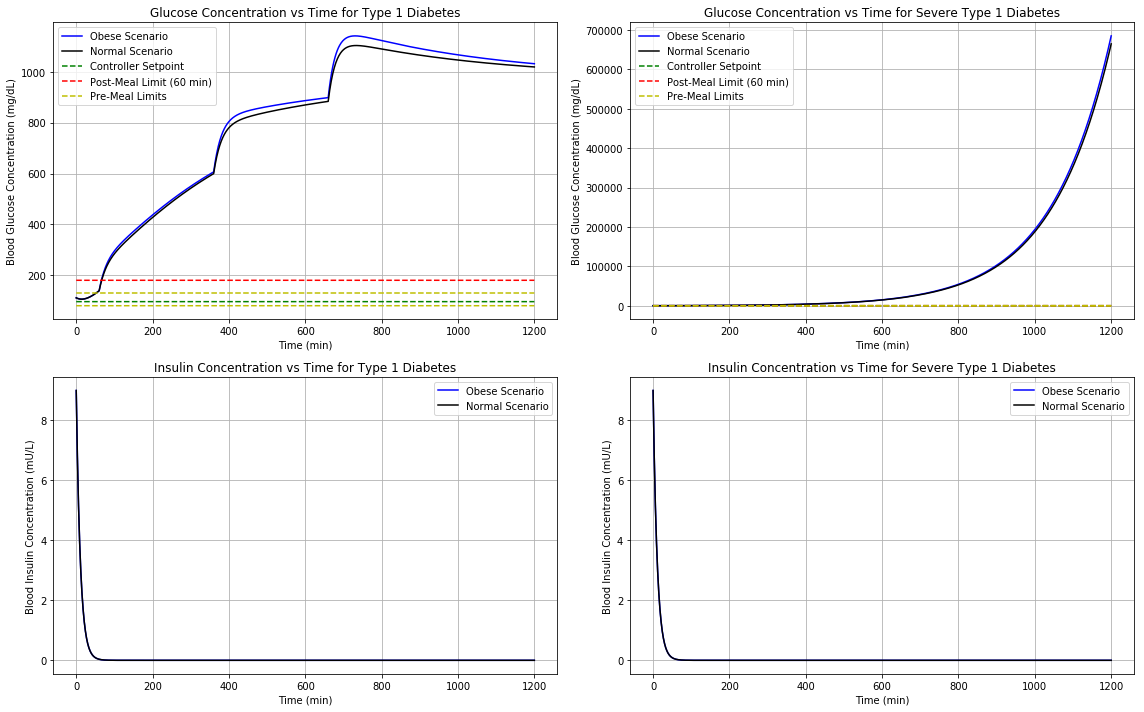

In [14]:
# Determine how body consumes glucose and whether the controller is active
U_set = 0

# Solve the System for both body types
soln = solve_system(P1,U_set,Kp,Kd,Ke,Gsp)
soln_s = solve_system(P1_s,U_set,Kp,Kd,Ke,Gsp)

# Plot the solutions
plot_model(t,soln,soln_s)

**Key Findings:** For no insulin treatment, for both normal and severe cases, blood glucose levels rose out of control and insulin levels dropped. The lack of blood glucose control yielded worse results for the severe case. 
The blood glucose response was worse for the obese scenario than for the normal scenario.

## B.1.5 Simulation 2: Basal Dose
This simulation models the changing blood glucose and insulin concentrations with time in diabetic patients in which the controller only delivers the basal dosage of insulin required to maintain a steady-state at the blood glucose level setpoint. The expected result is that glucose concentrations will reach a steady-state blood glucose concentration within acceptable levels. However, the timeframe for this to occur is predicted to be longer than is acceptable

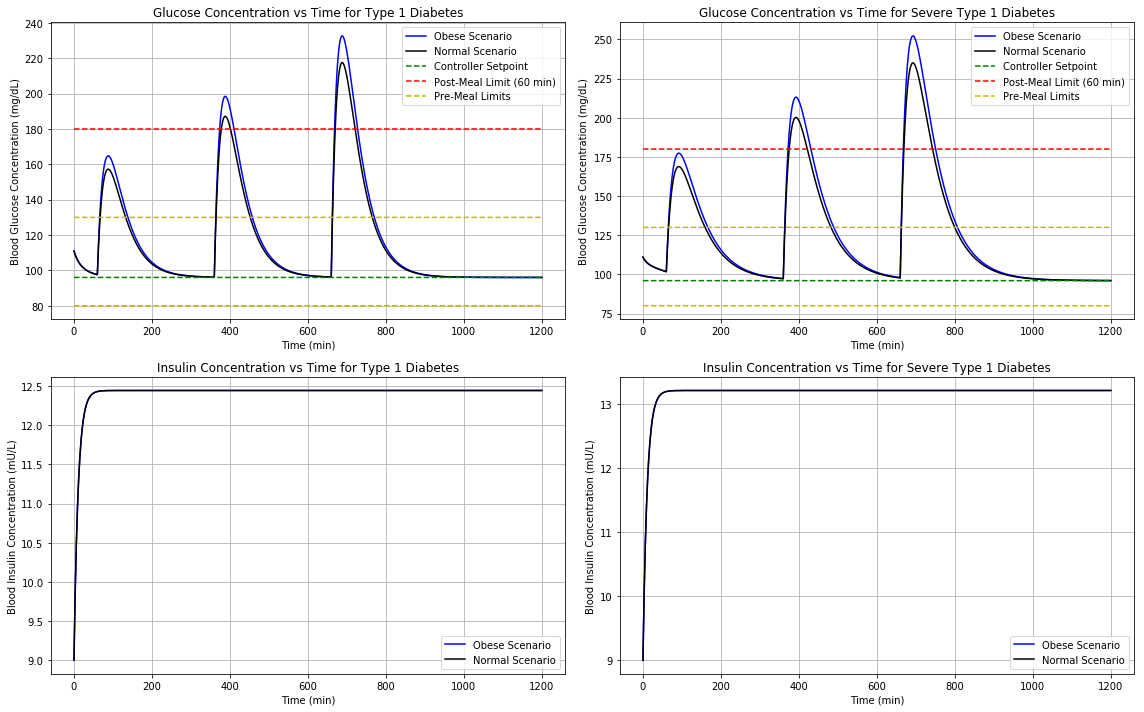

In [15]:
# Determine how body consumes glucose and whether the controller is active
P1 = 0.0287 # 1/min
P1_s = 0.02 # 1/min
U_set = 1

# Solve the System for both body types
soln = solve_system(P1,U_set,Kp,Kd,Ke,Gsp)
soln_s = solve_system(P1_s,U_set,Kp,Kd,Ke,Gsp)

# Plot the solutions
plot_model(t,soln,soln_s)

**Key Findings:** With a basal insulin dose, insulin concentration was maintained but blood glucose concentration rose to high levels (especially after meals) and did not decrease quick enough to be in the acceptable range. This was slightly worse for the severe case. Again, the blood glucose response was better in the normal scenario than the obese scenario

### B.1.5.1 Simulation 3: High-Concentration Injection Prior to Meal

This simulation models the changing blood glucose and insulin concentrations with time in diabetic patients in which the controller input is replaced with a single, high concentration dosage of fast-acting insulin prior to a meal. The expected result is that the injection will counteract the effects of the rapid rise of blood glucose due to the disturbance caused by meals, but will fail to sustain a steady-state after long periods of time.

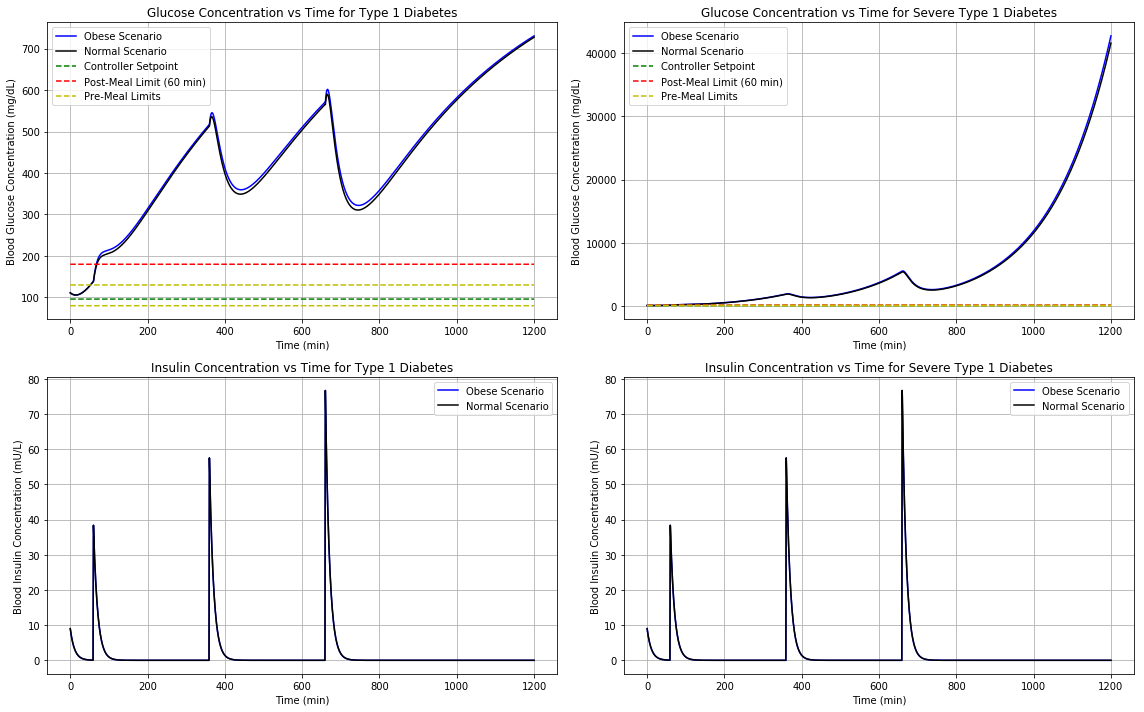

In [16]:
# Determine how body consumes glucose and whether the controller is active
P1 = 0.0287 # 1/min
P1_s = 0.02 # 1/min
U_set = 2

# Solve the System for both body types
soln = solve_system(P1,U_set,Kp,Kd,Ke,Gsp)
soln_s = solve_system(P1_s,U_set,Kp,Kd,Ke,Gsp)

# Plot the solutions
plot_model(t,soln,soln_s)

**Key Findings:** High concentration injections countered the large glucose intake of meals, but did not provide stable blood glucose levels in the long-term. This was especially worse in the severe case, where injections only minimally counteracted the glucose intake of meals. Insulin concentrations increased after injection but were not maintained at a non-zero level in the long-term.
The blood glucose response was more effective in the normal scenario when compared to the obese scenario, but only slightly.

### B.1.5.2 Simulation 4: High-Concentration Injection and Basal Dose

This simulation models the changing blood glucose and insulin concentrations with time in diabetic patients in which the controller input is the basal dosage alongside a single, high concentration dosage of fast-acting insulin prior to a meal. The expected result is that the injection will counteract the effects of the rapid rise of blood glucose due to the disturbance caused by meals and the basal dose will function to sustain a steady-state after long periods of time.

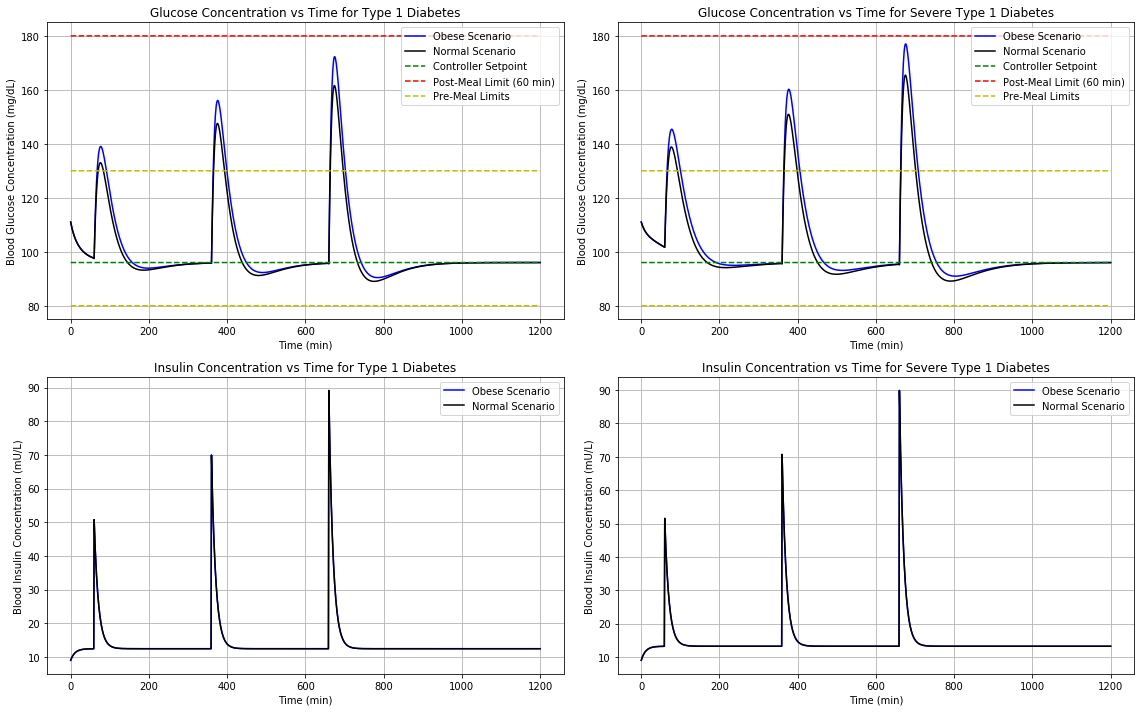

In [17]:
# Determine how body consumes glucose and whether the controller is active
P1 = 0.0287 # 1/min
P1_s = 0.02 # 1/min
U_set = 3

# Solve the System for both body types
soln = solve_system(P1,U_set,Kp,Kd,Ke,Gsp)
soln_s = solve_system(P1_s,U_set,Kp,Kd,Ke,Gsp)

# Plot the solutions
plot_model(t,soln,soln_s)

**Key Findings:** The combination of high concentration injections and basal insulin treatment kept blood glucose levels within acceptable post-meal limits and maintained stable glucose and insulin levels. This result was comparable for both normal and severe cases. There were blood glucose spikes after meals but were counteracted by the basal dose and injections, which brought these spikes back to acceptable limits. Furthermore, there was a slight overshoot of the setpoint as blood glucose levels returned to the setpoint level. Similarly, for insulin concentration, there were spikes after injections which returned to reasonable steady-state values after long periods of time. 
Again, the blood glucose response was better for the normal scenario when compared to the obese scenario.

## B.1.6 Simulation 5: PID Control

This simulation models the changing blood glucose and insulin concentrations with time in diabetic patients in which the controller input is regulated by a PID controller. The expected result is that the controller will counteract the effects of the rapid rise of blood glucose due to the disturbance caused by meals and reach a steady-state at long times. However, it is also expected to overshoot the setpoint value and possibly oscillate about the setpoint value for blood glucose concentration for a considerable period of time before reaching steady-state at the blood glucose setpoint.

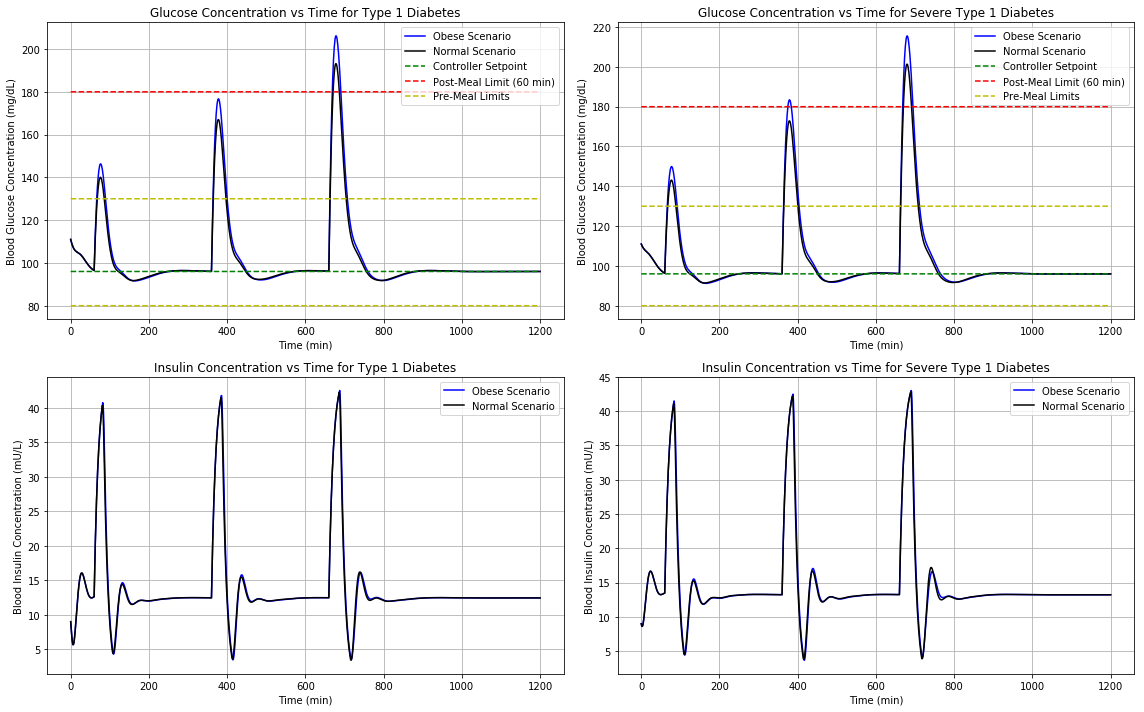

In [18]:
# Determine how body consumes glucose and whether the controller is active
P1 = 0.0287 # 1/min
P1_s = 0.02 # 1/min
U_set = 4

# Solve the System for both body types
soln = solve_system(P1,U_set,Kp,Kd,Ke,Gsp)
soln_s = solve_system(P1_s,U_set,Kp,Kd,Ke,Gsp)

# Plot the solutions
plot_model(t,soln,soln_s)

**Key Findings:** The PID controller allowed for stable long-term glucose and insulin levels and kept them mostly within acceptable limits. The responses were comparable for both normal and severe scenarios. Blood glucose levels surpassed post-meal limits after dinner, but dropped within the acceptable range within the acceptable time frame. For the other meals, blood glucose levels were kept within the acceptable range for the entire duration. There were slight overshoots as blood glucose levels returned to the setpoint. However, a stable level was maintained after long periods of time. Insulin concentrations fluctuated to counteract the effects of meals but also featured damped oscillations around the steady-state value. 
Again, the blood glucose response was better for the normal scenario than the obese scenario.

## B.1.7 Simulation 6: PID Control with Basal Dose

This simulation models the changing blood glucose and insulin concentrations with time in diabetic patients in which the controller input is regulated by a PID controller alongside the basal input for steady-state. The expected result is that the controller will counteract the effects of the rapid rise of blood glucose due to the disturbance caused by meals and reach a steady-state at long times. Since the basal dose is included in the expression, it is expected to reach steady-state without considerable oscillation about the setpoint value.

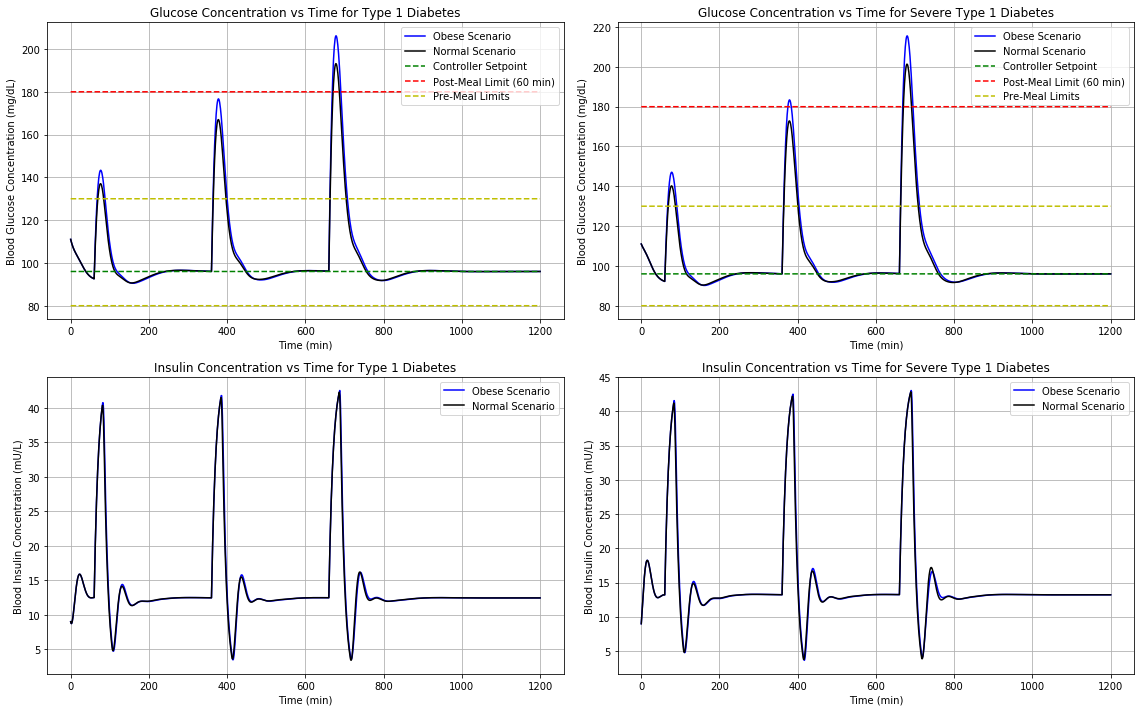

In [19]:
# Determine how body consumes glucose and whether the controller is active
P1 = 0.0287 # 1/min
P1_s = 0.02 # 1/min
U_set = 5

# Solve the System for both body types
soln = solve_system(P1,U_set,Kp,Kd,Ke,Gsp)
soln_s = solve_system(P1_s,U_set,Kp,Kd,Ke,Gsp)

# Plot the solutions
plot_model(t,soln,soln_s)

**Key Findings:** The results for PID control with a basal insulin dose was almost identical to the previous results for only PID control.

### B.1.7.1 Simulation 7: PID Control with Basal Dose and Injection

This simulation models the changing blood glucose and insulin concentrations with time in diabetic patients in which the controller input is regulated by a PID controller alongside the basal input for steady-state and a high-concentration dose of insulin prior to a meal. The expected result is that the controller will counteract the effects of the rapid rise of blood glucose due to the disturbance caused by meals much quicker than the PID controller with the basal dose due to the injection of insulin prior to a meal. As a result, it is also expected to reach steady-state quicker and without considerable oscillation about the setpoint value.

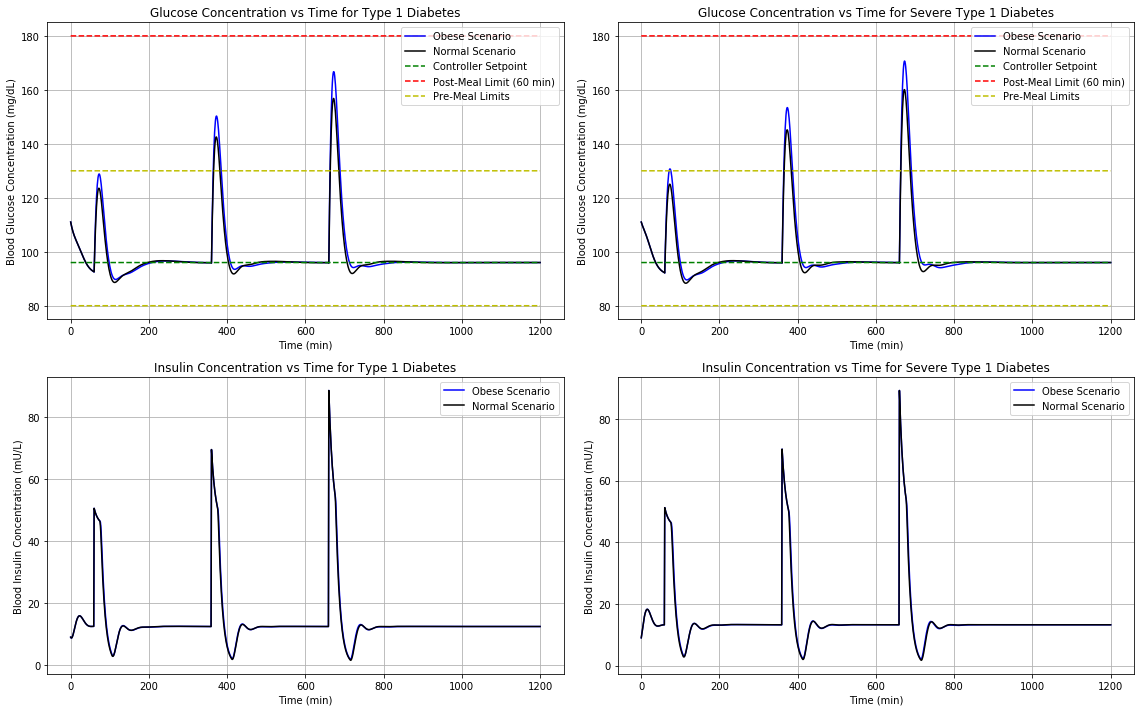

In [20]:
# Determine how body consumes glucose and whether the controller is active
P1 = 0.0287 # 1/min
P1_s = 0.02 # 1/min
U_set = 6

# Solve the System for both body types
soln = solve_system(P1,U_set,Kp,Kd,Ke,Gsp)
soln_s = solve_system(P1_s,U_set,Kp,Kd,Ke,Gsp)

# Plot the solutions
plot_model(t,soln,soln_s)

**Key Findings**: The combination of an injection, basal insulin treatment, and PID control provided the best regulation of blood glucose levels, though only slightly better than the injection and basal treatment alone. There were still noticeable increases in blood glucose levels after meals, but blood glucose levels were still kept below the accepted limits. There was slight overshoot and oscillation for blood glucose and insulin levels as they returned to stable values, but they were less severe than with only PID control.
Again, the blood glucose response was more severe in the obese scenario when compared to the normal scenario. The results for the normal and severe cases of diabetes were comparable. 

### B.1.7.2 Simulation 8: Exercise and Meal with no Control

This simulation models the changing blood glucose and insulin concentrations with time in diabetic patients in which the patient undergoes vigorous exercise and then eats a small meal without any controller input. It is expected that the meal will cause greater deviation from acceptable levels than the exercise and that no controller input will result in a rise in blood glucose past acceptable levels.

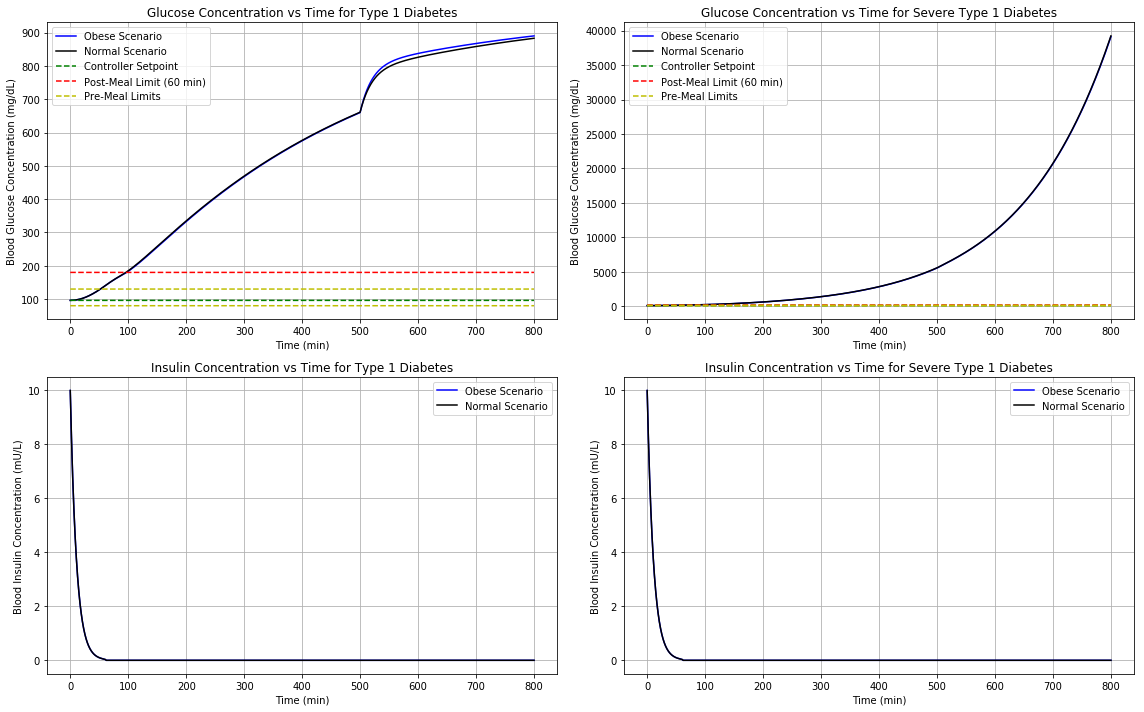

In [21]:
U_set = 0
duration = 30
t_ex_start = 60
ex_set = 90

# Solve the System for both body types
soln = solve_system_ex(P1,U_set,Kp,Kd,Ke,Gsp)
soln_s = solve_system_ex(P1_s,U_set,Kp,Kd,Ke,Gsp)

# Plot the solutions
plot_model(t_ex,soln,soln_s)

**Key Findings:** The results were similar to the previous case of no insulin treatment. For both normal and severe cases, blood glucose levels rose out of control and insulin levels dropped. The severe case yielded much worse blood glucose control than the standard case of Type 1 Diabetes. 
The blood glucose response was better in the normal scenario than the obese scenario

### B.1.7.3 Simulation 9: Exercise and Meal with only Basal Dose

This simulation models the changing blood glucose and insulin concentrations with time in diabetic patients in which the patient undergoes vigorous exercise and then eats a small meal with the only controller input being a basal dosage. It is expected that the meal will cause greater deviation from acceptable levels than the exercise and that the controller input will result in a steady-state being achieved at the blood glucose setpoint.

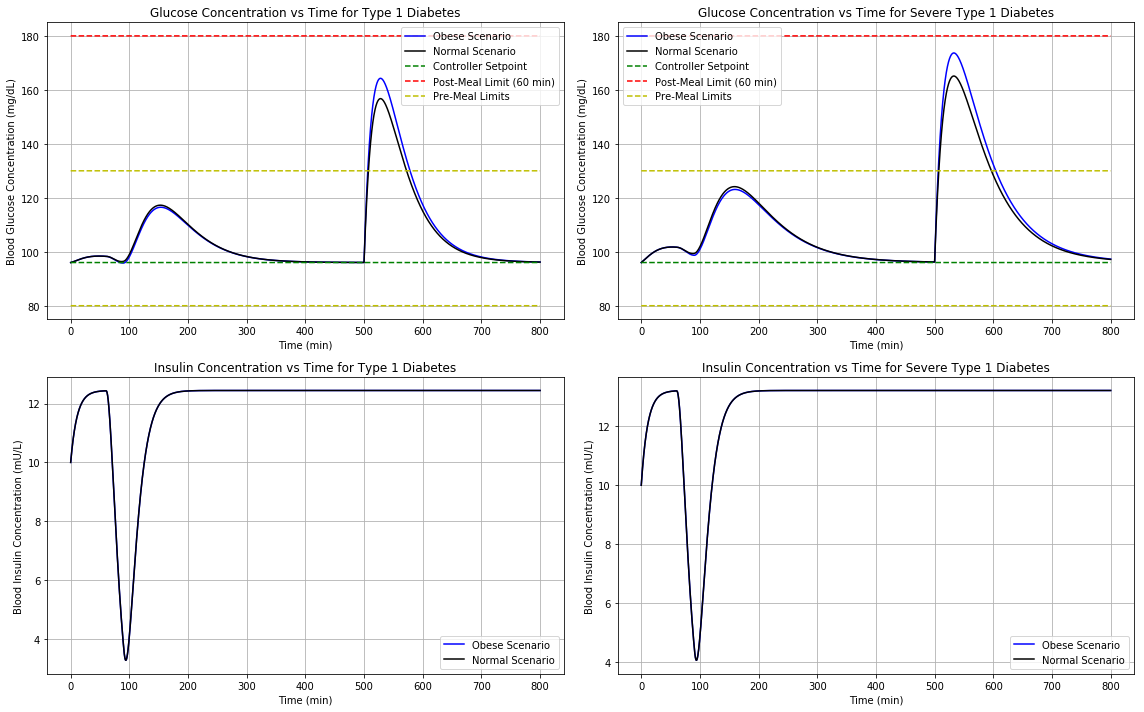

In [22]:
U_set = 1
duration = 30
t_ex_start = 60
ex_set = 70

# Solve the System for both body types
soln = solve_system_ex(P1,U_set,Kp,Kd,Ke,Gsp)
soln_s = solve_system_ex(P1_s,U_set,Kp,Kd,Ke,Gsp)

# Plot the solutions
plot_model(t_ex,soln,soln_s)

**Key Findings:** With basal dose insulin treatment, vigorous exercise led to a significant rise in blood glucose concentrations, though not as large of a rise as the meal. Additionally, blood glucose was still kept within the acceptable limits during exercise. There was a larger increase in blood glucose levels following the meal but values were within acceptable limits and a long term steady-state was achieved. Insulin concentration was mostly maintained at a stable level in the long-term, but featured a significant drop during exercise. The results were comparable for the normal and severe cases. Better blood glucose control was achieved for the normal scenario than the obese scenario. 

### B.1.7.4 Simulation 10: Exercise and Meal with PID Controller

This simulation models the changing blood glucose and insulin concentration with time in diabetic patients in which the patient undergoes vigorous exercise and then eats a small meal with the only controller input being a PID controller. It is expected that the meal will cause greater deviation from acceptable levels than the exercise and that the controller input will result in a steady-state being achieved at the blood glucose setpoint.

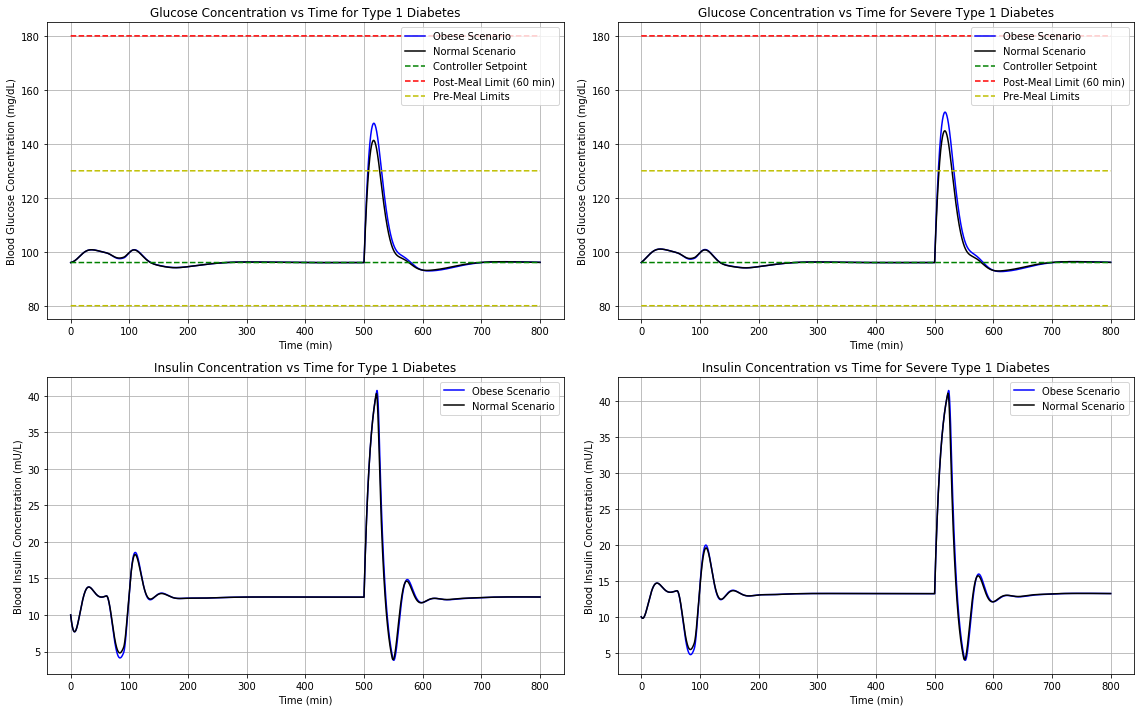

In [23]:
U_set = 2
duration = 30
t_ex_start = 60
ex_set = 70

# Solve the System for both body types
soln = solve_system_ex(P1,U_set,Kp,Kd,Ke,Gsp)
soln_s = solve_system_ex(P1_s,U_set,Kp,Kd,Ke,Gsp)

# Plot the solutions
plot_model(t_ex,soln,soln_s)

**Key Findings:** The PID controller kept blood glucose levels relatively stable with exercise. There was a slight rise in blood glucose levels with exercise, which corresponded with slight drop in insulin. However, the PID controller brought blood glucose and insulin levels to stable levels with some oscillation. Again, the response was slightly worse for the obese scenario while the normal versus severe case results were very similar. 

### B.1.7.5 Simulation 11: Exercise and Meal with PID Controller and Basal Dose

This simulation models the changing blood glucose and insulin concentrations with time in diabetic patients in which the patient undergoes vigorous exercise and then eats a small meal with the controller input being a basal dosage and PID controller. It is expected that the meal will cause greater deviation from acceptable levels than the exercise and that the controller input will result in a steady-state being achieved at the blood glucose setpoint with better performance than the PID controller by itself

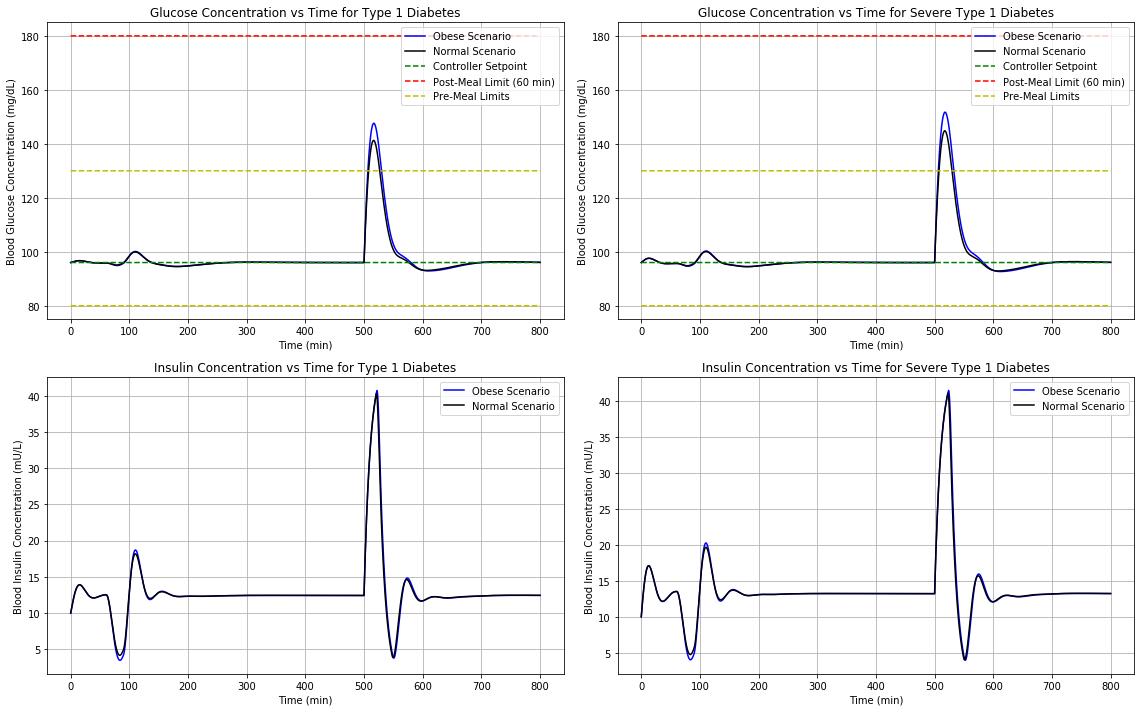

In [24]:
U_set = 3
duration = 30
t_ex_start = 60
ex_set = 70

# Solve the System for both body types
soln = solve_system_ex(P1,U_set,Kp,Kd,Ke,Gsp)
soln_s = solve_system_ex(P1_s,U_set,Kp,Kd,Ke,Gsp)

# Plot the solutions
plot_model(t_ex,soln,soln_s)

**Key Findings:** With PID control and a basal insulin dose, there was a slight improvement in blood glucose control during exercise. However, PID control with basal dose insulin treatment led to similar results as just the PID controller by itself. 

## B.1.8 Summary and Conclusion 

By themselves, a basal insulin administration rate and single, high-concentration injection prior to a meal were found to provide inadequate blood glucose control. The basal insulin rate treatment was able to provide long-term stabilization of blood glucose levels, but was unable to decrease blood glucose below the post-meal limit after 60 minutes. The high concentration injections were found to significantly curtail the effects of meals in the short-term, but could not provide long-term stability to satisfy the post-meal or pre-meal limits. When working in conjunction with each other (basal dose treatment and high concentration injections), blood glucose levels were within acceptable limits in both the short-term and long-term. When only considering exercise, the basal insulin treatment provided adequate blood glucose control by keeping glucose levels within the accepted limits.

PID-controlled insulin administration was found to be an effective means for blood glucose control. By itself and in conjunction with a basal insulin dosage, it was able to provide acceptable blood glucose control for both exercise and meal disturbances. The one area for improvement was observed when operating after meals with high glucose content, as the PID controller was able to just barely decrease the blood glucose levels below the post meal limits before a duration of 60 minutes had passed. This issue was remedied when both methods were paired with a high-concentration injection, though the resulting control was only marginally better than when operating with the basal insulin treatment and the high-concentration injection without the PID controller.

For all treatments, the blood glucose response pattern was similar for obese and normal body types, but the overall control was better in the normal body type scenario. Furthermore, the severe case of Type 1 diabetes showed similar response patterns to the normal cases, but the performance of the controller was slightly worse. The only noticeable exceptions occurred with no controller input, where the normal case appeared to stabilize at around $1000 \space mg\space dL^{-1}$ but the severe case did not stabilize at all.  

In summary, acceptable glucose control when considering the effects of meals and exercise was achieved when combining basal insulin treatment and a high-concentration insulin injection prior to a meal, when operating a PID controller by itself, when operating a PID controller with basal insulin treatment, and when combining all three insulin administration methods. Since the combination of the basal and injection treatments performed almost as well and were almost as robust as the combination of all three treatment methods, the question turns to whether a patient would be willing to pay more for a more expensive glucose control system for only slightly more optimal glucose control.

## B.1.9  Appendices

### B.1.9.1 References

Doyle, Edgar, Mellichamp, Seborg. Process Dynamics and Control 4e. Wiley 2017

https://www.ncbi.nlm.nih.gov/books/NBK441573/

https://www.tommys.org/pregnancy-information/pregnancy-complications/gestational-diabetes/treatment-gestational-diabetes/taking-medication-and-insulin-gestational-diabetes

https://www.jdrf.org/t1d-resources/about/facts/

https://www.verywellhealth.com/insulin-who-needs-it-and-who-doesnt-1087219

http://www.diabetes.org/diabetes-basics/type-1/

https://www.tommys.org/pregnancy-information/pregnancy-complications/gestational-diabetes/treatment-gestational-diabetes/taking-medication-and-insulin-gestational-diabetes

https://www.niddk.nih.gov/health-information/diabetes/overview/managing-diabetes/continuous-glucose-monitoring

https://www.webmd.com/diabetes/insulin-pump#1

https://www.cdc.gov/pregnancy/diabetes-gestational.html

http://www.diabetes.org/diabetes-basics/type-2/

https://www.mayoclinic.org/diseases-conditions/type-1-diabetes/symptoms-causes/syc-20353011

https://ieeexplore.ieee.org/document/1658142

https://www.cancer.org/cancer/cancer-causes/diet-physical-activity/body-weight-and-cancer-risk/adult-bmi.html

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2769581/


## B.1.10 Statement of Contributions 

Group Members: Kevin Hansen, James Bathon, Ramon Villafana

**Deliverables:**
> 1) Initial Project Statement: All members

> 2) Theory: Primaries - Kevin Hansen and Ramon Villafana, Editor - James Bathon

> 3) Presentation - All members

> 4) Final Report - See below

**Problem Statement:**


> ***Introduction and Problem:*** Primary - James Bathon,              Editors - Kevin Hansen and Ramon Villafana

> ***Technological Challenge:*** Primaries -  Kevin Hansen and Ramon Villafana,                   Editor - James Bathon

> ***Goals:*** All members


**Theoretical Development:**

> Primaries - Kevin Hansen and Ramon Villafana, Editor - James Bathon


**Results and Executables:**
> ***Executables/Coding:*** Primary - Kevin Hansen, Editors - James Bathon and Ramon Villafana

> ***Analyzing Results:*** All members 

> ***Key Findings:*** Primary - James Bathon, Editors - Kevin Hansen and Ramon Villafana

**Summary and Conclusion:**
> Primary - Kevin Hansen, Editors - James Bathon and Ramon Villafana

**Appendices and Research:**
> All members

<!--NAVIGATION-->
< [B.0 Student Projects](https://jckantor.github.io/CBE30338/B.00-Student-Projects.html) | [Contents](toc.html) | [Tag Index](tag_index.html) |